# [Modelo] Segmentación K-Means

### 1. Librerias: Cargamos las librerias que utilizaremos

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from data_processing.Clean_data import clean, tokenize, spanish_stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import joblib

%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 4)
plt.style.use('ggplot')

### 2. Extracción Base de datos: Cargamos nuestra base de datos

In [12]:
dataFramePre = pd.read_csv("training_data/TRAIN_CLUSTER3.tsv", sep='\t', quoting=csv.QUOTE_NONE, header=0)
print(dataFramePre.head())

                                          PARAMETROS            UNIDAD_ORG  \
0  NOTIFICA DISPOSICIÓN , REFERENTE AL CASO N°300...  PROCURADURIA PUBLICA   
1   (SE PROCEDE A FINALIZAR LAS NOTIFICACIONES DE...                   NaN   
2   (BOUCHER Y ACTAS DE AUDIENCIA ANEXADAS EN SU ...                   NaN   
3  FISCALÍA SUPRAPROVINCIAL CORPORATIVA ESPECIALI...  DESPACHO MINISTERIAL   
4  FISCALÍA SUPRAPROVINCIAL CORPORATIVA ESPECIALI...  DESPACHO MINISTERIAL   

                                           RESPUESTA  
0  ATENDIDAS Y DERIVADAS AL ÁREA DE SEGURIDAD PUB...  
1                                                NaN  
2                                                NaN  
3  OFICIO DIRIGIDO A LA FISCALÍA SUPRAPROVINCIAL ...  
4  ANGELIA ELIZABETH ZULOAGA BAYES - FISCAL ADJUN...  


In [ ]:
# Delete NAN

In [13]:
dataFramePre = dataFramePre.dropna()
dataFramePre.head()

,PARAMETROS,UNIDAD_ORG,RESPUESTA
0,"NOTIFICA DISPOSICIÓN , REFERENTE AL CASO N°300...",PROCURADURIA PUBLICA,ATENDIDAS Y DERIVADAS AL ÁREA DE SEGURIDAD PUB...
3,FISCALÍA SUPRAPROVINCIAL CORPORATIVA ESPECIALI...,DESPACHO MINISTERIAL,OFICIO DIRIGIDO A LA FISCALÍA SUPRAPROVINCIAL ...
4,FISCALÍA SUPRAPROVINCIAL CORPORATIVA ESPECIALI...,DESPACHO MINISTERIAL,ANGELIA ELIZABETH ZULOAGA BAYES - FISCAL ADJUN...
5,REMITE VAOUCHER DE PAGO POR PRINCIPIO DE OPORT...,PROCURADURIA PUBLICA,"NOTIFICACIONES ASIGNADAS AL ÁREA PENAL , CONDU..."
7,LA FISCALIA SUPRAPRONVINCIAL CORPORATIVA ESPEC...,DESPACHO MINISTERIAL,ANGELA ELIZABETH ZULOAGA BAYES - FISCAL ADJUNT...


In [ ]:
# Dimension del dataframe

In [14]:
dataFramePre.shape

(3747, 3)

In [ ]:
# Limpiando la data

In [15]:
#dataFramePre['PARAMETROS'] = dataFramePre['PARAMETROS'].map(lambda text: clean(text))
subject = dataFramePre['PARAMETROS']
print(subject)

0       NOTIFICA DISPOSICIÓN , REFERENTE AL CASO N°300...
3       FISCALÍA SUPRAPROVINCIAL CORPORATIVA ESPECIALI...
4       FISCALÍA SUPRAPROVINCIAL CORPORATIVA ESPECIALI...
5       REMITE VAOUCHER DE PAGO POR PRINCIPIO DE OPORT...
7       LA FISCALIA SUPRAPRONVINCIAL CORPORATIVA ESPEC...
                              ...                        
5816    BANDEJA DIGITAL: EN REFERENCIA AL OFICIO N° D0...
5822     HUAROCHIRI. (CORREO: LPINEDOA@CONGRESO.GOB.PE...
5823    TRASLADA COMUNICACIÓN PRESENTADA POR EL CIUDAD...
5824    BANDEJA DIGITAL: 1 SOLICITA PUBLICACIÓN OFICIA...
5826    OFICIO DE REQUERIMIENTO DE INFORMACIÓN - SUB G...
Name: PARAMETROS, Length: 3747, dtype: object


In [ ]:
# Vectorizando 

In [16]:
count_vectorizer = CountVectorizer(
        analyzer='word',
        tokenizer=tokenize,
        lowercase=True,
        stop_words=spanish_stopwords,
        decode_error='ignore'
    )
word_count_vector = count_vectorizer.fit_transform(subject)
print(count_vectorizer.get_feature_names())
print(word_count_vector.toarray())

['aba', 'abad', 'abalministeri', 'abancay', 'abandon', 'abant', 'abastec', 'abdi', 'abel', 'abenit', 'abgministeri', 'abiert', 'abit', 'abner', 'abon', 'abord', 'abordaj', 'abraham', 'abre', 'abril', 'absalon', 'absten', 'abstencion', 'absuelv', 'abtencion', 'abus', 'abvancay', 'acab', 'acaci', 'academ', 'acaec', 'acat', 'aced', 'aceler', 'acerc', 'acerv', 'aces', 'acha', 'achay', 'acident', 'aciert', 'acion', 'acionari', 'aclaracion', 'acob', 'acobamb', 'acog', 'acomay', 'acompan', 'acongres', 'acontralori', 'acopallp', 'acord', 'acos', 'acost', 'acr', 'acre', 'acredit', 'acreditacion', 'acta', 'actas', 'activ', 'acto', 'actos', 'actu', 'actuacion', 'actual', 'actualiz', 'actualizacion', 'acuat', 'acuerd', 'acumul', 'acumulacion', 'acumuladaspcm', 'adecu', 'adelant', 'adem', 'adend', 'adendasministeri', 'adeolart', 'aderly', 'aderson', 'adhesion', 'adicional', 'adj', 'adjudicacion', 'adjungt', 'adjunt', 'adjuntacongres', 'adjunti', 'adjuntoministeri', 'adjuntopcm', 'administr', 'admin

In [ ]:
# Aplicando TF-IDF

In [17]:
tfidf_transformer=TfidfTransformer(use_idf=True) 
tfidf_transformer.fit(word_count_vector)
X=tfidf_transformer.transform(word_count_vector)
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 3. Metodología: Usamos la metodología definida en clase.

In [18]:
#### 3.1 Modelamiento
#### 3.2 Evaluación


#### 3.6 Modelamiento

In [19]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances_argmin_min 

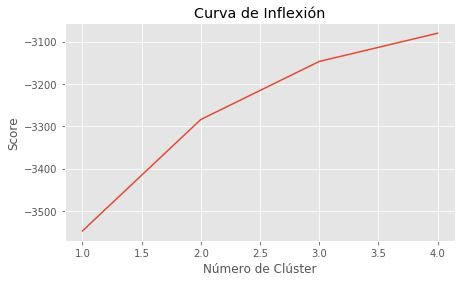

In [20]:
# Calculando el número de clúster adecuado: Scrore es ka distancia interna

numClus = range(1, 5) # Con rango de 1, 5  solo creamos 4 cluster
kmeans = [KMeans(n_clusters=i,max_iter=600, algorithm = 'auto',random_state=99) for i in numClus]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(numClus,score)
plt.xlabel('Número de Clúster')
plt.ylabel('Score')
plt.title('Curva de Inflexión')
plt.show()

In [ ]:
## Como se puede ver la silueta esta  muy suavizada y no se nota un codo claro en la grafica por lo que seguiremos analaizando 
## otros indicadores

In [21]:
# Nos fijamos de los indicadores de clustering:

ctdDf = int(0.1*dataFramePre.shape[0])
cluster = [kmeans[i].predict(X) for i in range(len(kmeans))]

for i in range(1,4):   # FIJARSE EN EL NRO DE CLUSTER QUE ESTAN CREANDO EN ESTE CASO 4 
    print(str(i+1)+' clústeres:')
    print('Inercia: '+str(kmeans[i].inertia_))
    print('Silueta: '+str(metrics.silhouette_score(X, cluster[i], metric='euclidean',sample_size=ctdDf)))
    print("\n")

2 clústeres:
Inercia: 3284.14282356041
Silueta: 0.07782798098091763


3 clústeres:
Inercia: 3147.1256087776064
Silueta: 0.10202590299625967


4 clústeres:
Inercia: 3080.4314139019716
Silueta: 0.1262660498704794




In [ ]:
#Elejimos el mejor cluster en este caso 4, menor distancia interna y mayor distancia externa

In [22]:
best_Model = kmeans[3]
cluster_predict = best_Model.predict(X)
cluster_predict

array([2, 0, 0, ..., 0, 0, 0])

In [23]:
# nro de filas cluster_predict

len(cluster_predict)

3747

In [24]:
# nro de filas de la data debe coincidir con la anterior

len(dataFramePre)

3747

In [25]:
# Agregamos una columna a nuestra data
dataFramePre["nro_Cluster"] = pd.Series(cluster_predict)
dataFramePre.head(5)

,PARAMETROS,UNIDAD_ORG,RESPUESTA,nro_Cluster
0,"NOTIFICA DISPOSICIÓN , REFERENTE AL CASO N°300...",PROCURADURIA PUBLICA,ATENDIDAS Y DERIVADAS AL ÁREA DE SEGURIDAD PUB...,2.0
3,FISCALÍA SUPRAPROVINCIAL CORPORATIVA ESPECIALI...,DESPACHO MINISTERIAL,OFICIO DIRIGIDO A LA FISCALÍA SUPRAPROVINCIAL ...,1.0
4,FISCALÍA SUPRAPROVINCIAL CORPORATIVA ESPECIALI...,DESPACHO MINISTERIAL,ANGELIA ELIZABETH ZULOAGA BAYES - FISCAL ADJUN...,0.0
5,REMITE VAOUCHER DE PAGO POR PRINCIPIO DE OPORT...,PROCURADURIA PUBLICA,"NOTIFICACIONES ASIGNADAS AL ÁREA PENAL , CONDU...",3.0
7,LA FISCALIA SUPRAPRONVINCIAL CORPORATIVA ESPEC...,DESPACHO MINISTERIAL,ANGELA ELIZABETH ZULOAGA BAYES - FISCAL ADJUNT...,0.0


In [26]:
dataFramePre.to_excel("excel/output.xlsx")  

### 3.- Esamblamos los pasos  seguidos anteriormente

In [4]:
### Metodo que limpia los textos 

In [27]:
def test_model(model, X_train, ngram_range, use_idf):
    count_vectorizer = CountVectorizer(
        analyzer='word',
        tokenizer=tokenize,
        lowercase=True,
        stop_words=spanish_stopwords,
        decode_error='ignore',
        ngram_range=ngram_range
    )

    text_cluster = Pipeline([
        ('vect', count_vectorizer),  # strings to token integer counts
        ('tfidf', TfidfTransformer(use_idf=use_idf)),  # integer counts to weighted TF-IDF scores
        ('cls', model)  # train on TF-IDF vectors w/ Naive Bayes classifier
    ])

    text_cluster.fit(X_train)
   
    return text_cluster

In [33]:
model = KMeans(n_clusters=4,max_iter=600, algorithm = 'auto',random_state=99)
model_predict = test_model(model, subject, (1, 1), True)
joblib.dump(model_predict, "results_models_test/k_means_cluster.joblib")

['results_models_test/k_means_cluster.joblib']